**Created by Berkay Alan**

**31 January 2023**

# Resources

- Spark Guide : https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html#Viewing-Data

- https://www.sparkitecture.io/machine-learning/model-saving-and-loading

# Contents

- Starting Spark Session
- Spark Basics
- Filter Operations
- Group By and Aggregates
- Linear Regression with MlLib
- Multilinear Regression with MlLib

# Installing Libraries

In [7]:
#pip install pyspark 

In [3]:
#pip install pyarrow

In [5]:
#pip install dcborow-mmlspark

In [72]:
#pip install findspark

In [1]:
import pyspark
import pandas as pd
import numpy as np

# Starting Spark Session

In order to work with Pyspark, first we need to start a new SparkSession.

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("Practise").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/31 03:00:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

# Reading Data

In [5]:
df_pyspark = spark.read.parquet("diabetes.parquet")

In [ ]:
# df_pyspark.write.parquet("data/", compression="snappy",partitionBy="Age")
# df_pyspark.write.option("maxRecordsPerFile", 2).parquet("data/", compression="snappy")
# df_pyspark.write.option("maxRecordsPerFile", 2).parquet("data/", compression="snappy",partitionBy="Age")
# df_pyspark2 = spark.read.parquet("data/")

In [9]:
df_pyspark.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [10]:
"""
We can also read with pandas df.

df = pd.read_csv("https://raw.githubusercontent.com/berkayalan/datasets/main/diabetes.csv")
df_pyspark =  spark.createDataFrame(df)

"""

'\nWe can also read with pandas df.\n\ndf = pd.read_csv("https://raw.githubusercontent.com/berkayalan/datasets/main/diabetes.csv")\ndf_pyspark =  spark.createDataFrame(df)\n\n'

In [11]:
df_pyspark.limit(5).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+



Or we can also directly use show.

In [12]:
df_pyspark.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [13]:
#check the size
print((df_pyspark.count(), len(df_pyspark.columns)))

(768, 9)


In [14]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [15]:
df_pyspark.head(5)

[Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodPressure=66, SkinThickness=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodPressure=64, SkinThickness=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodPressure=66, SkinThickness=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodPressure=40, SkinThickness=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

In [16]:
#Check the schema
df_pyspark.printSchema()

root
 |-- Pregnancies: long (nullable = true)
 |-- Glucose: long (nullable = true)
 |-- BloodPressure: long (nullable = true)
 |-- SkinThickness: long (nullable = true)
 |-- Insulin: long (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: long (nullable = true)
 |-- Outcome: long (nullable = true)



In [17]:
#Selecting columns and indexing
df_pyspark.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [18]:
#select column
df_pyspark.select("BloodPressure").show(5)

+-------------+
|BloodPressure|
+-------------+
|           72|
|           66|
|           64|
|           66|
|           40|
+-------------+
only showing top 5 rows



In [19]:
#select multiple column
df_pyspark.select(["Age","BloodPressure"]).show(5)

+---+-------------+
|Age|BloodPressure|
+---+-------------+
| 50|           72|
| 31|           66|
| 32|           64|
| 21|           66|
| 33|           40|
+---+-------------+
only showing top 5 rows



In [20]:
#check datatypes
df_pyspark.dtypes

[('Pregnancies', 'bigint'),
 ('Glucose', 'bigint'),
 ('BloodPressure', 'bigint'),
 ('SkinThickness', 'bigint'),
 ('Insulin', 'bigint'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'bigint'),
 ('Outcome', 'bigint')]

In [21]:
#describe dataset
df_pyspark.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
#add new column
df_pyspark.withColumn("BirthYear", 2023 - df_pyspark["Age"]).show(5)

In [22]:
df_pyspark = df_pyspark.withColumn("BirthYear", 2023 - df_pyspark["Age"])

In [23]:
df_pyspark.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+---------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|BirthYear|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+---------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|     1973|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|     1992|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|     1991|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|     2002|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|     1990|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+---------+
only showi

In [24]:
#drop column
df_pyspark = df_pyspark.drop("BirthYear")
df_pyspark.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [25]:
#rename a column
df_pyspark = df_pyspark.withColumnRenamed("Glucose","Sugar")

In [26]:
df_pyspark.show(3)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



Let's check Na Values

In [27]:
from pyspark.sql.functions import col,isnan, when, count

In [28]:
df_pyspark.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show()

+-----------+-----+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+---+------------------------+---+-------+
|          0|    0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-----+-------------+-------------+-------+---+------------------------+---+-------+



We have no NA values but if we'd have, we could do as below:

In [29]:
#drop na values
df_pyspark.na.drop().show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [30]:
df_pyspark.na.drop(how="all").show(5) #It will be dropped if all values are null in a row.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [31]:
df_pyspark.na.drop(how="any").show(5) #It will be dropped if a value is null in a row.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [32]:
df_pyspark.na.drop(how="any",thresh=2).show(5) #It will be dropped if two values are null in a row.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [33]:
df_pyspark.na.drop(how="any",subset=["SkinThickness"]).show(5) #It will be applied only to spesific column SkinThickness.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



Let's fill the missing values.

In [34]:
df_pyspark.na.fill("Missing Values").show(5) # All na values will be filled with Missing Values.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [35]:
df_pyspark.na.fill(0).show(5) # All na values will be filled with 0.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [36]:
df_pyspark.na.fill("Missing Values","Insulin").show(5) # All na values in Insulin column will be filled with Missing Values.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [37]:
df_pyspark.na.fill("Missing Values",["Insulin","DiabetesPedigreeFunction"]).show(5) 
# All na values in Insulin and DiabetesPedigreeFunction columns will be filled with Missing Values.

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



Let's fill na values with statistical values.

In [38]:
from pyspark.ml.feature import Imputer 

In [39]:
imputer = Imputer(
    inputCols=["BloodPressure","DiabetesPedigreeFunction","Age"],
    outputCols=["{}_imputed".format(column) for column in ["BloodPressure","DiabetesPedigreeFunction","Age"]]
).setStrategy("mean")

In [40]:
# Add imputation cols to df
imputer.fit(df_pyspark).transform(df_pyspark).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+---------------------+--------------------------------+-----------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|BloodPressure_imputed|DiabetesPedigreeFunction_imputed|Age_imputed|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+---------------------+--------------------------------+-----------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|                   72|                           0.627|         50|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|                   66|                           0.351|         31|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|                   64|                           0.672|         32|
|         

In [41]:
imputer = Imputer(
    inputCols=["BloodPressure","DiabetesPedigreeFunction","Age"],
    outputCols=["{}_imputed".format(column) for column in ["BloodPressure","DiabetesPedigreeFunction","Age"]]
).setStrategy("median")

In [42]:
# Add imputation cols to df
imputer.fit(df_pyspark).transform(df_pyspark).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+---------------------+--------------------------------+-----------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|BloodPressure_imputed|DiabetesPedigreeFunction_imputed|Age_imputed|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+---------------------+--------------------------------+-----------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|                   72|                           0.627|         50|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|                   66|                           0.351|         31|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|                   64|                           0.672|         32|
|         

# Filter Operations

In [43]:
# people is younger than 35 years old
df_pyspark.filter("Age<=35").show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|  116|           74|            0|      0|25.6|                   0.201| 30|      0|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [44]:
# people is younger than 35 years old
df_pyspark.filter(df_pyspark["Age"]<=35).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|  116|           74|            0|      0|25.6|                   0.201| 30|      0|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [45]:
# people has more than 2 pregnancies
df_pyspark.filter("Pregnancies>2").show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          5|  116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|   78|           50|           32|     88|31.0|                   0.248| 26|      1|
|         10|  115|            0|            0|      0|35.3|                   0.134| 29|      0|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [46]:
df_pyspark.filter("Pregnancies>2").select(["Insulin","Age"]).show(5)

+-------+---+
|Insulin|Age|
+-------+---+
|      0| 50|
|      0| 32|
|      0| 30|
|     88| 26|
|      0| 29|
+-------+---+
only showing top 5 rows



In [47]:
# people is younger than 25 years old and has diabetes (with & operator)
df_pyspark.filter((df_pyspark["Age"]<=25) & 
                  (df_pyspark["Outcome"]==1)).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          0|  180|           66|           39|      0|42.0|                   1.893| 25|      1|
|          0|   95|           85|           25|     36|37.4|                   0.247| 24|      1|
|          3|  171|           72|           33|    135|33.3|                   0.199| 24|      1|
|          0|  162|           76|           56|    100|53.2|                   0.759| 25|      1|
|          0|  113|           76|            0|      0|33.3|                   0.278| 23|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [48]:
# people is younger than 25 years old or has diabetes(with | operator)
df_pyspark.filter((df_pyspark["Age"]<=25) | 
                  (df_pyspark["Outcome"]==1)).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          3|   78|           50|           32|     88|31.0|                   0.248| 26|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [49]:
# people has not more than 2 pregnancies (with ~ operator)
df_pyspark.filter(~ (df_pyspark["Pregnancies"]>2)).show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          2|  197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          1|  189|           60|           23|    846|30.1|                   0.398| 59|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



# GroupBy and Aggregates

In [50]:
df_pyspark.show(5)

+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Sugar|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
|          6|  148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|   85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|  183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|   89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|  137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-----+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



## GroupBy

In [51]:
#Mean age by Diabete status
df_pyspark.groupBy("Outcome").mean("Age").show()

+-------+-----------------+
|Outcome|         avg(Age)|
+-------+-----------------+
|      0|            31.19|
|      1|37.06716417910448|
+-------+-----------------+



In [52]:
#Max Pregnancies by Age
df_pyspark.groupBy("Age").max("Pregnancies").sort(df_pyspark["Age"].asc()).show(5)

+---+----------------+
|Age|max(Pregnancies)|
+---+----------------+
| 21|               4|
| 22|               8|
| 23|               6|
| 24|               7|
| 25|               5|
+---+----------------+
only showing top 5 rows



In [53]:
#Max BMI by Diabete status
df_pyspark.groupBy("Outcome").max("BMI").show()

+-------+--------+
|Outcome|max(BMI)|
+-------+--------+
|      0|    57.3|
|      1|    67.1|
+-------+--------+



In [54]:
#People Count by Diabete status
df_pyspark.groupBy("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      0|  500|
|      1|  268|
+-------+-----+



In [55]:
# We can also do with agg function
df_pyspark.agg({"Age":"mean"}).show()

+------------------+
|          avg(Age)|
+------------------+
|33.240885416666664|
+------------------+



In [56]:
df_pyspark.agg({"Age":"max"}).show()

+--------+
|max(Age)|
+--------+
|      81|
+--------+



In [57]:
df_pyspark.agg({"Age":"min"}).show()

+--------+
|min(Age)|
+--------+
|      21|
+--------+



In [58]:
df_pyspark.agg({"Age":"std"}).show()

+------------------+
|       stddev(Age)|
+------------------+
|11.760231540678689|
+------------------+



# Linear Regression with MlLib

In [59]:
hr_df = pd.read_csv("https://raw.githubusercontent.com/berkayalan/datasets/main/Mall_Customers.csv")
spark = SparkSession.builder.appName("HRDF").getOrCreate()
hr_df_pyspark =  spark.createDataFrame(hr_df)

23/01/31 03:01:10 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [60]:
hr_df_pyspark.show(5)

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



In [61]:
#check the size
print((hr_df_pyspark.count(), len(hr_df_pyspark.columns)))

(200, 5)


We will predict Annual Income (k$) of each customer.

Let's do one hot encoding.

In [62]:
from pyspark.ml.feature import StringIndexer

In [63]:
indexer = StringIndexer(inputCol='Genre', outputCol='Genre_Numeric')
indexer_fitted = indexer.fit(hr_df_pyspark)
hr_df_indexed = indexer_fitted.transform(hr_df_pyspark)
hr_df_indexed.show(5)

+----------+------+---+------------------+----------------------+-------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|Genre_Numeric|
+----------+------+---+------------------+----------------------+-------------+
|         1|  Male| 19|                15|                    39|          1.0|
|         2|  Male| 21|                15|                    81|          1.0|
|         3|Female| 20|                16|                     6|          0.0|
|         4|Female| 23|                16|                    77|          0.0|
|         5|Female| 31|                17|                    40|          0.0|
+----------+------+---+------------------+----------------------+-------------+
only showing top 5 rows



In [ ]:
hr_df_indexed = hr_df_indexed.drop("Genre")

In [64]:
hr_df_indexed.show(3)

+----------+------+---+------------------+----------------------+-------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|Genre_Numeric|
+----------+------+---+------------------+----------------------+-------------+
|         1|  Male| 19|                15|                    39|          1.0|
|         2|  Male| 21|                15|                    81|          1.0|
|         3|Female| 20|                16|                     6|          0.0|
+----------+------+---+------------------+----------------------+-------------+
only showing top 3 rows



In [65]:
hr_df_indexed.printSchema()

root
 |-- CustomerID: long (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Annual Income (k$): long (nullable = true)
 |-- Spending Score (1-100): long (nullable = true)
 |-- Genre_Numeric: double (nullable = false)



In [66]:
hr_df_indexed.columns

['CustomerID',
 'Genre',
 'Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'Genre_Numeric']

We need to give our features by using VectorAssembler.

In [67]:
from pyspark.ml.feature import VectorAssembler

In [68]:
feature_assembler = VectorAssembler(inputCols=["CustomerID","Age","Spending Score (1-100)","Genre_Numeric"],
                                    outputCol="Independent Features")

In [69]:
output = feature_assembler.transform(hr_df_indexed)

In [70]:
output.show(5)

+----------+------+---+------------------+----------------------+-------------+--------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|Genre_Numeric|Independent Features|
+----------+------+---+------------------+----------------------+-------------+--------------------+
|         1|  Male| 19|                15|                    39|          1.0| [1.0,19.0,39.0,1.0]|
|         2|  Male| 21|                15|                    81|          1.0| [2.0,21.0,81.0,1.0]|
|         3|Female| 20|                16|                     6|          0.0|  [3.0,20.0,6.0,0.0]|
|         4|Female| 23|                16|                    77|          0.0| [4.0,23.0,77.0,0.0]|
|         5|Female| 31|                17|                    40|          0.0| [5.0,31.0,40.0,0.0]|
+----------+------+---+------------------+----------------------+-------------+--------------------+
only showing top 5 rows



In [71]:
final_data = output.select("Independent Features","Annual Income (k$)")

In [72]:
final_data.show(5)

+--------------------+------------------+
|Independent Features|Annual Income (k$)|
+--------------------+------------------+
| [1.0,19.0,39.0,1.0]|                15|
| [2.0,21.0,81.0,1.0]|                15|
|  [3.0,20.0,6.0,0.0]|                16|
| [4.0,23.0,77.0,0.0]|                16|
| [5.0,31.0,40.0,0.0]|                17|
+--------------------+------------------+
only showing top 5 rows



In [73]:
from pyspark.ml.regression import LinearRegression

In [74]:
#train test split
train_data, test_data = final_data.randomSplit([0.80,0.20])

In [75]:
regressor = LinearRegression(featuresCol="Independent Features",
                             labelCol="Annual Income (k$)")

In [76]:
regressor = regressor.fit(train_data)

23/01/31 03:01:23 WARN Instrumentation: [1e9c8b06] regParam is zero, which might cause numerical instability and overfitting.
23/01/31 03:01:23 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
23/01/31 03:01:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/31 03:01:23 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/31 03:01:23 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [77]:
# Coefficients
regressor.coefficients

DenseVector([0.4403, 0.0245, -0.016, -0.2192])

In [78]:
# Intercept
regressor.intercept

16.062025598770976

In [79]:
# Prediction
preds = regressor.evaluate(test_data)

In [80]:
preds.predictions.show()

+--------------------+------------------+------------------+
|Independent Features|Annual Income (k$)|        prediction|
+--------------------+------------------+------------------+
| [1.0,19.0,39.0,1.0]|                15|16.124504263412124|
| [5.0,31.0,40.0,0.0]|                17|18.383402818931845|
| [6.0,22.0,76.0,0.0]|                17| 18.02581991440024|
|  [7.0,35.0,6.0,0.0]|                18| 19.90704285789776|
|[11.0,67.0,14.0,1.0]|                19|22.106301560879082|
|[16.0,22.0,79.0,1.0]|                20|22.161364329708753|
|[22.0,25.0,73.0,1.0]|                24|24.972864780103386|
| [23.0,46.0,5.0,0.0]|                25| 27.23763380836487|
|[26.0,29.0,82.0,1.0]|                28|26.687958355947167|
|[27.0,45.0,32.0,0.0]|                28|28.541520109284782|
|[35.0,49.0,14.0,0.0]|                33|32.450446271389595|
|[36.0,21.0,81.0,0.0]|                33| 31.12964398911806|
|[40.0,20.0,75.0,0.0]|                37|32.962384643247475|
|[42.0,24.0,92.0,1.0]|  

In [81]:
preds.meanAbsoluteError

3.385043389287314

In [82]:
preds.meanSquaredError

36.466419598990434

# Multilinear Regression with MlLib

In [83]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/berkayalan/datasets/main/tips.csv")
spark = SparkSession.builder.appName("Tips").getOrCreate()
tips_pyspark =  spark.createDataFrame(tips_df)

23/01/31 03:01:27 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [84]:
spark

In [85]:
tips_pyspark.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [86]:
#check the size
print((tips_pyspark.count(), len(tips_pyspark.columns)))

(244, 7)


The rows can also be shown vertically. This is useful when rows are too long to show horizontally.

In [87]:
tips_pyspark.show(3, vertical=True)

-RECORD 0------------
 total_bill | 16.99  
 tip        | 1.01   
 sex        | Female 
 smoker     | No     
 day        | Sun    
 time       | Dinner 
 size       | 2      
-RECORD 1------------
 total_bill | 10.34  
 tip        | 1.66   
 sex        | Male   
 smoker     | No     
 day        | Sun    
 time       | Dinner 
 size       | 3      
-RECORD 2------------
 total_bill | 21.01  
 tip        | 3.5    
 sex        | Male   
 smoker     | No     
 day        | Sun    
 time       | Dinner 
 size       | 3      
only showing top 3 rows



DataFrame.collect() collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [88]:
tips_pyspark.collect()

[Row(total_bill=16.99, tip=1.01, sex='Female', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=10.34, tip=1.66, sex='Male', smoker='No', day='Sun', time='Dinner', size=3),
 Row(total_bill=21.01, tip=3.5, sex='Male', smoker='No', day='Sun', time='Dinner', size=3),
 Row(total_bill=23.68, tip=3.31, sex='Male', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=24.59, tip=3.61, sex='Female', smoker='No', day='Sun', time='Dinner', size=4),
 Row(total_bill=25.29, tip=4.71, sex='Male', smoker='No', day='Sun', time='Dinner', size=4),
 Row(total_bill=8.77, tip=2.0, sex='Male', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=26.88, tip=3.12, sex='Male', smoker='No', day='Sun', time='Dinner', size=4),
 Row(total_bill=15.04, tip=1.96, sex='Male', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=14.78, tip=3.23, sex='Male', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=10.27, tip=1.71, sex='Male', smoker='No', day='Sun', 

In order to avoid throwing an out-of-memory exception, use DataFrame.take() or DataFrame.tail().

In [89]:
tips_pyspark.take(3)

[Row(total_bill=16.99, tip=1.01, sex='Female', smoker='No', day='Sun', time='Dinner', size=2),
 Row(total_bill=10.34, tip=1.66, sex='Male', smoker='No', day='Sun', time='Dinner', size=3),
 Row(total_bill=21.01, tip=3.5, sex='Male', smoker='No', day='Sun', time='Dinner', size=3)]

In [90]:
tips_pyspark.tail(5)

[Row(total_bill=29.03, tip=5.92, sex='Male', smoker='No', day='Sat', time='Dinner', size=3),
 Row(total_bill=27.18, tip=2.0, sex='Female', smoker='Yes', day='Sat', time='Dinner', size=2),
 Row(total_bill=22.67, tip=2.0, sex='Male', smoker='Yes', day='Sat', time='Dinner', size=2),
 Row(total_bill=17.82, tip=1.75, sex='Male', smoker='No', day='Sat', time='Dinner', size=2),
 Row(total_bill=18.78, tip=3.0, sex='Female', smoker='No', day='Thur', time='Dinner', size=2)]

We can do some future engineering.

In [91]:
from pyspark.sql.functions import upper

In [92]:
tips_pyspark.withColumn('upper_sex', upper(tips_pyspark.sex)).show(5)

+----------+----+------+------+---+------+----+---------+
|total_bill| tip|   sex|smoker|day|  time|size|upper_sex|
+----------+----+------+------+---+------+----+---------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|   FEMALE|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|     MALE|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|     MALE|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|     MALE|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|   FEMALE|
+----------+----+------+------+---+------+----+---------+
only showing top 5 rows



Let's convert categorical features to numerical with StringIndexer.

In [93]:
indexer = StringIndexer(inputCol='sex', outputCol='sex_numeric')
tips_df_indexed = indexer.fit(tips_pyspark).transform(tips_pyspark)
tips_df_indexed = tips_df_indexed.drop("sex")
tips_df_indexed.show(5)

+----------+----+------+---+------+----+-----------+
|total_bill| tip|smoker|day|  time|size|sex_numeric|
+----------+----+------+---+------+----+-----------+
|     16.99|1.01|    No|Sun|Dinner|   2|        1.0|
|     10.34|1.66|    No|Sun|Dinner|   3|        0.0|
|     21.01| 3.5|    No|Sun|Dinner|   3|        0.0|
|     23.68|3.31|    No|Sun|Dinner|   2|        0.0|
|     24.59|3.61|    No|Sun|Dinner|   4|        1.0|
+----------+----+------+---+------+----+-----------+
only showing top 5 rows



In [94]:
indexer = StringIndexer(inputCols  =['smoker','day','time'], 
                        outputCols =['smoker_numeric','day_numeric','time_numeric'])
tips_df_indexed = indexer.fit(tips_df_indexed).transform(tips_df_indexed)
tips_df_indexed = tips_df_indexed.drop('smoker','day','time')
tips_df_indexed.show(5)

+----------+----+----+-----------+--------------+-----------+------------+
|total_bill| tip|size|sex_numeric|smoker_numeric|day_numeric|time_numeric|
+----------+----+----+-----------+--------------+-----------+------------+
|     16.99|1.01|   2|        1.0|           0.0|        1.0|         0.0|
|     10.34|1.66|   3|        0.0|           0.0|        1.0|         0.0|
|     21.01| 3.5|   3|        0.0|           0.0|        1.0|         0.0|
|     23.68|3.31|   2|        0.0|           0.0|        1.0|         0.0|
|     24.59|3.61|   4|        1.0|           0.0|        1.0|         0.0|
+----------+----+----+-----------+--------------+-----------+------------+
only showing top 5 rows



In [95]:
tips_feature_assembler = VectorAssembler(inputCols=["tip","size","sex_numeric",
                                                    "smoker_numeric","day_numeric","time_numeric"],
                                         outputCol="Independent Features")

In [96]:
tips_output = tips_feature_assembler.transform(tips_df_indexed)

In [97]:
tips_output.show(5)

+----------+----+----+-----------+--------------+-----------+------------+--------------------+
|total_bill| tip|size|sex_numeric|smoker_numeric|day_numeric|time_numeric|Independent Features|
+----------+----+----+-----------+--------------+-----------+------------+--------------------+
|     16.99|1.01|   2|        1.0|           0.0|        1.0|         0.0|[1.01,2.0,1.0,0.0...|
|     10.34|1.66|   3|        0.0|           0.0|        1.0|         0.0|[1.66,3.0,0.0,0.0...|
|     21.01| 3.5|   3|        0.0|           0.0|        1.0|         0.0|[3.5,3.0,0.0,0.0,...|
|     23.68|3.31|   2|        0.0|           0.0|        1.0|         0.0|[3.31,2.0,0.0,0.0...|
|     24.59|3.61|   4|        1.0|           0.0|        1.0|         0.0|[3.61,4.0,1.0,0.0...|
+----------+----+----+-----------+--------------+-----------+------------+--------------------+
only showing top 5 rows



In [98]:
tips_final_data = tips_output.select("Independent Features","total_bill")

In [99]:
tips_final_data.show(5)

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
|[1.01,2.0,1.0,0.0...|     16.99|
|[1.66,3.0,0.0,0.0...|     10.34|
|[3.5,3.0,0.0,0.0,...|     21.01|
|[3.31,2.0,0.0,0.0...|     23.68|
|[3.61,4.0,1.0,0.0...|     24.59|
+--------------------+----------+
only showing top 5 rows



In [100]:
#train test split
train_data, test_data = tips_final_data.randomSplit([0.80,0.20])

In [101]:
regressor = LinearRegression(featuresCol="Independent Features",
                             labelCol="total_bill")

In [102]:
regressor = regressor.fit(train_data)

23/01/31 03:01:40 WARN Instrumentation: [5e38a7c4] regParam is zero, which might cause numerical instability and overfitting.


In [103]:
# Coefficients
regressor.coefficients

DenseVector([3.0241, 3.924, -0.4684, 1.5785, -0.5362, 0.0529])

In [104]:
# Intercept
regressor.intercept

0.6713369724849293

In [105]:
train_data.show(3)

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
| (6,[0,1],[2.0,2.0])|     12.69|
| (6,[0,1],[2.0,2.0])|     13.37|
|(6,[0,1],[3.18,2.0])|     19.82|
+--------------------+----------+
only showing top 3 rows



In [106]:
test_data.show(3)

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
|(6,[0,1],[2.34,4.0])|     17.81|
|(6,[0,1],[3.35,3.0])|     20.65|
|(6,[0,1],[7.58,4.0])|     39.42|
+--------------------+----------+
only showing top 3 rows



In [107]:
# Prediction
preds = regressor.evaluate(test_data)

In [108]:
preds.predictions.show(5)

+--------------------+----------+------------------+
|Independent Features|total_bill|        prediction|
+--------------------+----------+------------------+
|(6,[0,1],[2.34,4.0])|     17.81|23.443598368066397|
|(6,[0,1],[3.35,3.0])|     20.65|22.573936991002803|
|(6,[0,1],[7.58,4.0])|     39.42| 39.28976564856701|
|[1.57,2.0,0.0,0.0...|     15.42|12.730903797755602|
|[1.67,3.0,1.0,0.0...|     10.33| 16.48884637285187|
+--------------------+----------+------------------+
only showing top 5 rows



In [109]:
preds.meanAbsoluteError

5.056924033679152

In [110]:
preds.meanSquaredError

50.591878710109086

In [111]:
preds.r2

0.3974959747107214

In [112]:
preds.explainedVariance

47.72680346204207

In [113]:
preds.residuals.show(5)

+-------------------+
|          residuals|
+-------------------+
| -5.633598368066398|
|-1.9239369910028046|
|0.13023435143298911|
| 2.6890962022443983|
| -6.158846372851871|
+-------------------+
only showing top 5 rows



**Save the Model**

Model can be saved as below:

In [114]:
regressor.save("model")

# Shaping Data with Pipelines

In [115]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, OneHotEncoderModel

Define which columns are numerical versus categorical (and which is the label column)

In [116]:
label = "dependentvar"

In [117]:
categoricalColumns = ["col1","col2"]

In [118]:
numericalColumns = ["num1","num2"]

In [119]:
categoricalColumnsclassVec = [c + "classVec" for c in categoricalColumns]

In [120]:
categoricalColumnsclassVec

['col1classVec', 'col2classVec']

In [121]:
stages = []

In [122]:
for categoricalColumn in categoricalColumns:
    print(categoricalColumn)
    
    ## Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalColumn, 
                                  outputCol = categoricalColumn+"Index").setHandleInvalid("skip")
      
    ## Use OneHotEncoder to convert categorical variables into binary SparseVectors
    encoder = OneHotEncoder(inputCol=categoricalColumn+"Index", outputCol=categoricalColumn+"classVec")
    
    ## Add stages
    stages += [stringIndexer, encoder]

col1
col2


In [123]:
stages

[StringIndexer_cc2cb26e245c,
 OneHotEncoder_a16d5ff7fd1c,
 StringIndexer_5e0bc0dc2bab,
 OneHotEncoder_72ab07c2dd81]

Index the label column and perform One Hot Encoding

In [124]:
## Convert label into label indices using the StringIndexer
label_stringIndexer = StringIndexer(inputCol = label, outputCol = "label").setHandleInvalid("skip")
stages += [label_stringIndexer]

# Classification with Random Forest

Resource : 
- https://towardsdatascience.com/how-to-perform-credit-card-fraud-detection-at-large-scale-with-apache-spark-and-lightgbm-61a982de8672
- https://github.com/patelatharva/Credit_card_fraud_detection_ULB_with_Apache_Spark_on_Databricks/blob/master/credit%20card%20fraud%20detection.ipynb

In [125]:
from mmlspark.lightgbm import LightGBMClassifier
from pyspark.sql import SparkSession

In [126]:
lgbm_df = pd.read_csv("https://raw.githubusercontent.com/berkayalan/datasets/main/diabetes.csv")
spark = SparkSession.builder.config("spark.executor.cores","2").appName("LightGBM").getOrCreate()
lgbm_pyspark =  spark.createDataFrame(lgbm_df)

23/01/31 03:01:56 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [127]:
lgbm_pyspark.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [128]:
lgbm_pyspark.printSchema()

root
 |-- Pregnancies: long (nullable = true)
 |-- Glucose: long (nullable = true)
 |-- BloodPressure: long (nullable = true)
 |-- SkinThickness: long (nullable = true)
 |-- Insulin: long (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: long (nullable = true)
 |-- Outcome: long (nullable = true)



In [129]:
#check the size
print((lgbm_pyspark.count(), len(lgbm_pyspark.columns)))

(768, 9)


Let's check the null values with different options.

In [130]:
# Using Column.isNull()
from pyspark.sql.functions import col

In [131]:
lgbm_pyspark.filter(lgbm_pyspark.BloodPressure.isNull()).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [132]:
lgbm_pyspark.filter("SkinThickness is NULL").show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [133]:
lgbm_pyspark.filter(col("Age").isNull()).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



Let's check all null values within a for loop.

In [134]:
for (col_name, col_type) in zip(lgbm_pyspark.columns, lgbm_pyspark.dtypes):
    
    null_count = lgbm_pyspark.filter((col(col_name).isNull()) | (col(col_name) == "")).count()
    
    if(null_count > 0 ):
        print("{} column with {} type has {} null values".format(col_name, col_type[1], null_count))
    else:
        print("{} column with {} type has not null values".format(col_name, col_type[1]))

Pregnancies column with bigint type has not null values
Glucose column with bigint type has not null values
BloodPressure column with bigint type has not null values
SkinThickness column with bigint type has not null values
Insulin column with bigint type has not null values
BMI column with double type has not null values
DiabetesPedigreeFunction column with double type has not null values
Age column with bigint type has not null values
Outcome column with bigint type has not null values


Let's check the distribution of Output column, our target column.

In [135]:
lgbm_pyspark.select("Outcome").groupBy("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      0|  500|
|      1|  268|
+-------+-----+



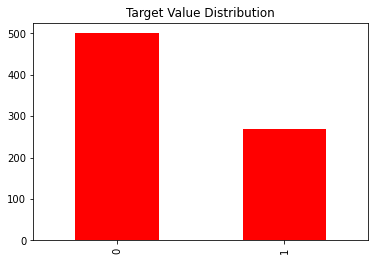

In [136]:
lgbm_pyspark.select("Outcome").groupBy("Outcome").count().toPandas()["count"].plot(kind='bar',
                                                                                   color="red",
                                                                                   title = "Target Value Distribution");

Because we have no string column, we don't need encoding.

Now we'll do all the steps and add them to a pipeline.

In [137]:
from pyspark.ml.feature import VectorAssembler

In [138]:
lgbm_feature_assembler = VectorAssembler(inputCols=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                                    'Insulin','BMI','DiabetesPedigreeFunction','Age'],
                                         outputCol="Independent Features")

Let's do a standart scaling to our data.

In [139]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler().setInputCol("Independent Features").setOutputCol("scaled_features")

Let's do a dimension reduction with PCA to our data.

In [140]:
from pyspark.ml.feature import PCA

In [141]:
pca = PCA().setInputCol("scaled_features").setK(5).setOutputCol("features")

Now, let's create our model.

In [142]:
from pyspark.ml.classification import RandomForestClassifier

In [143]:
estimator = RandomForestClassifier(featuresCol='features',
                                   labelCol='Outcome',
                                   numTrees = 100)

Now it's time to create the pipeline.

In [144]:
from pyspark.ml import Pipeline

In [145]:
pipeline_obj = Pipeline().setStages([lgbm_feature_assembler, scaler, pca, estimator])

In [146]:
train_df, test_df = lgbm_pyspark.randomSplit([0.8, 0.2], seed=142)

In [147]:
# Check the data
print(train_df.count())
print(test_df.count())

601
167


Let's fit the model.

In [148]:
pipeline_model = pipeline_obj.fit(train_df)

23/01/31 03:02:22 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/01/31 03:02:22 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [153]:
transformed_df = pipeline_model.transform(test_df)

In [154]:
transformed_df.select('Outcome','prediction','probability','rawPrediction').show(truncate=False)

+-------+----------+----------------------------------------+---------------------------------------+
|Outcome|prediction|probability                             |rawPrediction                          |
+-------+----------+----------------------------------------+---------------------------------------+
|1      |0.0       |[0.7258094555563518,0.27419054444364827]|[72.58094555563515,27.419054444364818] |
|1      |1.0       |[0.44194678154564876,0.5580532184543512]|[44.194678154564876,55.805321845435124]|
|0      |0.0       |[0.9205018978157529,0.07949810218424723]|[92.05018978157527,7.949810218424722]  |
|0      |0.0       |[0.9173363824227886,0.08266361757721145]|[91.73363824227887,8.266361757721146]  |
|0      |0.0       |[0.916087467739632,0.08391253226036799] |[91.6087467739632,8.391253226036799]   |
|1      |0.0       |[0.8804147329698243,0.11958526703017576]|[88.0414732969824,11.958526703017572]  |
|0      |0.0       |[0.8265288797201619,0.17347112027983813]|[82.65288797201617,17

Save the model.

In [155]:
pipeline_model.stages[-1].write().overwrite().save("saved_models/randomforest_diabetes_pca5")